## DNA sequencing
### Lecture 2 example (unfilled)

Recall that in Lecture 2, we saw the DNA sequencing problem and a way to approach it as an Eulerian path problem. Here, we use *networkx*, an excellent network analysis package, to solve this. 

See https://networkx.github.io for more details. Also see the `intro.ipynb` we have provided you with.

In one of the examples in class we had a set of subsequences:

In [2]:
subsequences = ['CAT' , 'ATT' , 'ATG', 'TAT' , 'TTG', 'TGC', 'TGT' , 'GTA']


First, we write a code that produces the graph (as discussed in class).

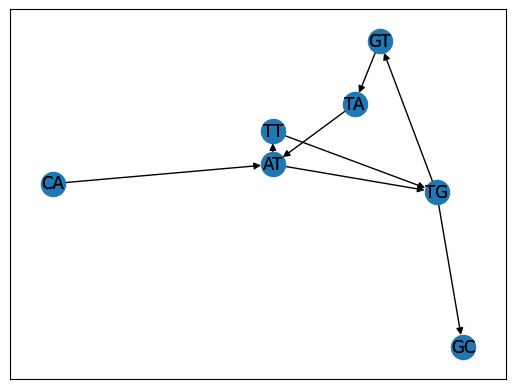

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def construct_graph_from(sub):
    G = nx.DiGraph()
    s=[]
    for i in sub:
        s.append(i[0:2])
        s.append(i[1:3])
    G.add_nodes_from(s)

    for (i,j) in  combinations(G.nodes(),2):
        if i[1]==j[0]:
            concat=i[0]+j
            if concat in sub:
                G.add_edge(i,j)
        if j[1]==i[0]:
            concat=j[0]+i
            if concat in sub:
                G.add_edge(j,i)

    #################
    ### Fill this ###
    ################# 
    
    return G

G = construct_graph_from(subsequences) 
pos=nx.spring_layout(G) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

Now, we write a code to find an **Eulerian path**. Networkx has a function *eulerian_circuit(graph, source)* that we may use. However, it returns a cycle -- not a path. 

How can we turn our graph into one that has an Eulerian cycle? *Maybe* add an edge between the end node and the start node? And how can we find a suitable start node?

In [5]:
#################
### Fill this ###
################# 
for i in G.nodes():
    if G.in_degree(i)<G.out_degree(i):
        start=i
    elif G.out_degree(i)<G.in_degree(i):
        stop= i

G.add_edge(stop,start)

# start=0 # ???

cycle=list(nx.eulerian_circuit(G, start))
print(cycle)

[('CA', 'AT'), ('AT', 'TT'), ('TT', 'TG'), ('TG', 'GT'), ('GT', 'TA'), ('TA', 'AT'), ('AT', 'TG'), ('TG', 'GC'), ('GC', 'CA')]
